In [2]:
from transformers import ViltProcessor, ViltForQuestionAnswering

model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/136k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/470M [00:00<?, ?B/s]

In [3]:
import requests
from PIL import Image

processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")

# download an input image
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
text = "How many cats are there?"

# prepare inputs
inputs = processor(image, text, return_tensors="pt")

preprocessor_config.json:   0%|          | 0.00/251 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/320 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [4]:
import torch

# forward pass
with torch.no_grad():
    outputs = model(**inputs)

logits = outputs.logits
idx = logits.argmax(-1).item()
print("Predicted answer:", model.config.id2label[idx])

Predicted answer: 2


In [8]:
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation

processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")


preprocessor_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/974 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.73k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/603M [00:00<?, ?B/s]

In [10]:
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
texts = ["a cat", "a remote", "a blanket"]

inputs = processor(text=texts, images=[image] * len(texts), padding=True, return_tensors="pt")


Unused or unrecognized kwargs: padding.


In [12]:
import torch

with torch.no_grad():
    outputs = model(**inputs)

logits = outputs.logits
print(logits.shape)



torch.Size([3, 352, 352])


[Text(0, -15, 'a cat'), Text(0, -15, 'a remote'), Text(0, -15, 'a blanket')]

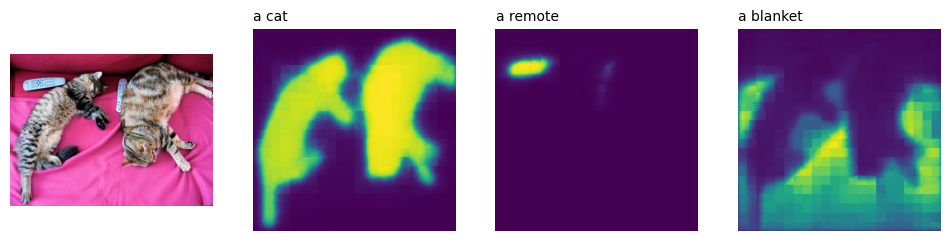

In [13]:
import matplotlib.pyplot as plt

logits = logits.unsqueeze(1)

_, ax = plt.subplots(1, len(texts) + 1, figsize=(3*(len(texts) + 1), 12))
[a.axis('off') for a in ax.flatten()]
ax[0].imshow(image)
[ax[i+1].imshow(torch.sigmoid(logits[i][0])) for i in range(len(texts))];
[ax[i+1].text(0, -15, prompt) for i, prompt in enumerate(texts)]
